**Сферические искажения**

In [41]:
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt
import cv2 as cv
img = cv.imread("QR.jpg")

# Проведем калибровку камеры, для этого сделаем фотографии шахматной доски и
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((7*7,3), np.float32) # 7*7 - внутрение углы клеток обычной шахматной доски
objp[:,:2] = np.mgrid[0:7,0:7].T.reshape(-1,2)
objpoints = []
imgpoints = []
for fname in glob.glob('imagesChessboard/*.jpg'):
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, corners = cv.findChessboardCorners(gray, (7,7), None)
    if ret == True:
        # углы нашлись
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
cv.destroyAllWindows()

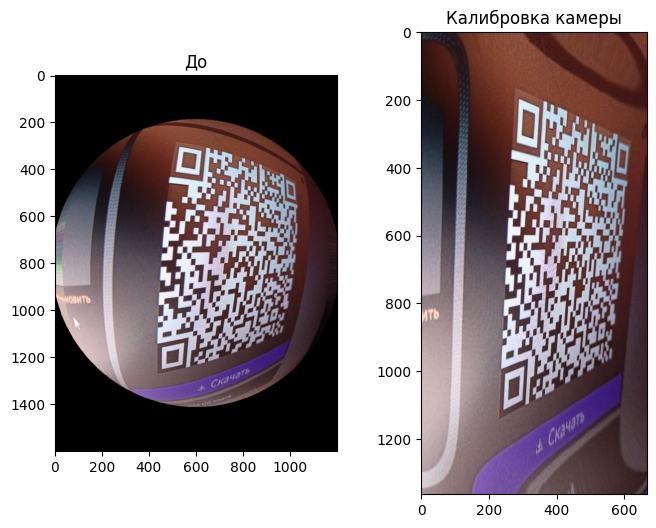

True

In [43]:
# калибровка
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
# исправим изображение
img=cv.imread("QR.jpg")
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
plt.figure(figsize=(8,6))
plt.subplot(121),plt.imshow(img),plt.title('До')
plt.subplot(122),plt.imshow(dst),plt.title('Калибровка камеры')
plt.show()
cv.imwrite('newQR.jpg', dst)

**Геометрические искажения**

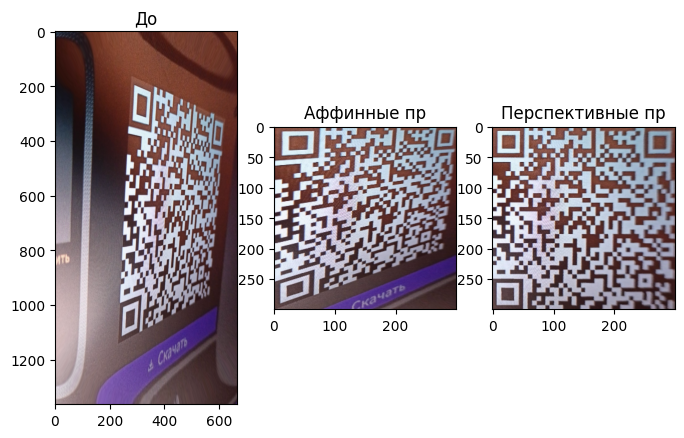

In [45]:
img2 = dst
rows,cols,ch = img2.shape
# укажем угловые точки QR
pts1A = np.float32([[275,163],[619,321],[230,1142]])
pts2A = np.float32([[0,0],[300,0],[0,300]])
mA = cv.getAffineTransform(pts1A,pts2A)
dstA = cv.warpAffine(img2,mA,(300,300))
pts1P = np.float32([[275,163],[619,321],[230,1142],[563,961]])
pts2P = np.float32([[0,0],[300,0],[0,300],[300,300]])
mP = cv.getPerspectiveTransform(pts1P,pts2P)
dstP = cv.warpPerspective(img2,mP,(300,300))
plt.figure(figsize=(8,6))
plt.subplot(131),plt.imshow(img2),plt.title('До')
plt.subplot(132),plt.imshow(dstA),plt.title('Аффинные пр')
plt.subplot(133),plt.imshow(dstP),plt.title('Перспективные пр')
plt.show()


**Размытость**

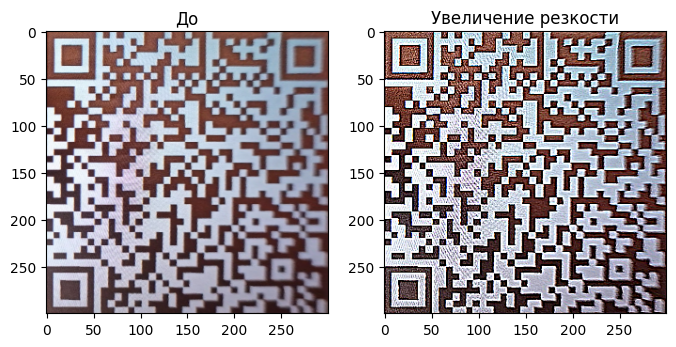

In [46]:
sharpImg = cv.filter2D(dstP, -1, kernel=np.array([[-1, -1, -1],[-1,  9, -1],[-1, -1, -1]]))
plt.figure(figsize=(8,6))
plt.subplot(121),plt.imshow(dstP),plt.title('До')
plt.subplot(122),plt.imshow(sharpImg),plt.title('Увеличение резкости')
plt.show()

**Плохое освещение**

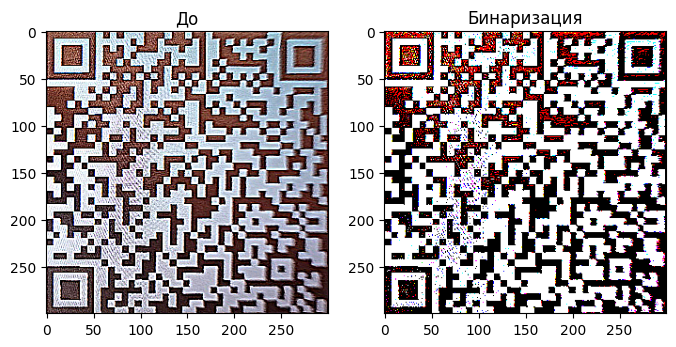

In [47]:
threshold_value = 128
max_value = 255
_, binary_image = cv.threshold(sharpImg, threshold_value, max_value, cv.THRESH_BINARY)
plt.figure(figsize=(8,6))
plt.subplot(121),plt.imshow(sharpImg),plt.title('До')
plt.subplot(122),plt.imshow(binary_image),plt.title('Бинаризация')
plt.show()

In [55]:
# сравнение распознования изначального изображения и результата работы всех остальных алгоритмов исправления искажений
detector = cv.wechat_qrcode_WeChatQRCode()

res, points = detector.detectAndDecode(img)
if len(res) > 0:
    print("QR на изначальном фото распознан")
else:
  print("QR на изначальном фото не распознан")

res, points = detector.detectAndDecode(binary_image)
if len(res) > 0:
    print("QR на итоговом изображении распознан")
else:
  print("QR на итоговом изображении не распознан")

QR на изначальном фото не распознан
QR на итоговом изображении распознан
